In [10]:
import Pkg
Pkg.add("MetaGraphs")
Pkg.add("LightGraphs")
Pkg.add("Compose")
Pkg.add("GraphPlot")

  Resolving package versions...
  Installed GraphPlot ─ v0.4.4
Updating `C:\Users\aebou\.julia\environments\v1.5\Project.toml`
  [a2cc645c] + GraphPlot v0.4.4
Updating `C:\Users\aebou\.julia\environments\v1.5\Manifest.toml`
  [a2cc645c] + GraphPlot v0.4.4


In [2]:
using DelimitedFiles
using LightGraphs
using MetaGraphs
using Compose
using GraphPlot

In [3]:
"""
    kep_pool

Contruct a pool from a `.wmd` and a `.dat` files from PrefLib.
    
# Parameters
* `wmd_file::String` : Absolute path of the `.wmd` file.
* `dat_file::String` : Absolute path of the `.dat` file.
"""
function kep_pool(wmd_file::String, dat_file::String)
    
    wmd_file_name = split(split(wmd_file, '/')[end], '.')[1]
    dat_file_name = split(split(dat_file, '/')[end], '.')[1]

    wmd_file_name == dat_file_name || throw(ArgumentError(".wmd and .dat files do not correspond to the same dataset."))
    isfile(wmd_file) || throw(ArgumentError(".wmd file not found."))
    isfile(dat_file) || throw(ArgumentError(".dat file not found."))

    # Extract the graph structure from the .wmd file using a MetaGraph
    file = readdlm(wmd_file, '\n')
    V = parse(Int, split(file[1],',')[1])
    
    # Create a directed metagraph with nodes V and inital edge weights 0 
    pool = MetaDiGraph(V, 0)
    for line in file[2:end]
        splitted_line = split(line, ',')
        if length(splitted_line) == 3
            # /!\ Pairs are numbered from 0 in the second part of the file
            source = parse(Int, splitted_line[1]) + 1
            destination = parse(Int, splitted_line[2]) + 1
            weight = parse(Int, splitted_line[3])
            # Create an arc with given source and destination
            add_edge!(pool, source, destination)
            # Set its weight property
            set_prop!(pool, source, destination, :weight, weight)
        end
    end

    # SOME INFORMATION THAT CAN BE USEFUL BUT NOT NECESSARY FOR THE PROJECT
    # Extract meta information from the .dat file
#     file = readdlm(dat_file, '\n')
#     for line in file[2:end]
#         splitted_line = split(line, ',')
#         pair = parse(Int, splitted_line[1])
#         set_prop!(pool, pair, :donor, splitted_line[2])
#         set_prop!(pool, pair, :patient, splitted_line[3])
#         set_prop!(pool, pair, :wifep, parse(Bool, splitted_line[4]))
#         set_prop!(pool, pair, :pra, parse(Float64, splitted_line[5]))
#         set_prop!(pool, pair, :altruist, parse(Bool, splitted_line[7]))
#     end
#     Va = [v for v in vertices(pool) if get_prop(pool, v, :altruist)]
#     set_prop!(pool, :nb_altruist, length(Va))

    return pool

end

kep_pool

In [4]:
data_folder = string(@__DIR__,"/data")
instance = "MD-00001-00000010"
wmd_file = joinpath(data_folder, join([instance, ".wmd"]))
dat_file = joinpath(data_folder, join([instance, ".dat"]))
pool = kep_pool(wmd_file, dat_file)

{16, 47} directed Int64 metagraph with Int64 weights defined by :weight (default weight 0)

In [5]:
"Number of vertices in the pool is: $(nv(pool))"

"Number of vertices in the pool is: 16"

In [6]:
"Number of vertices in the pool is: $(ne(pool))"

"Number of vertices in the pool is: 47"

In [7]:
weights = [get_prop(pool, arc, :weight) for arc in edges(pool)]

47-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [8]:
for arc in edges(pool)
    println("There is an arc going from node $(arc.src) to $(arc.dst). It is: ",arc)
end

There is an arc going from node 1 to 3. It is: Edge 1 => 3
There is an arc going from node 1 to 16. It is: Edge 1 => 16
There is an arc going from node 2 to 4. It is: Edge 2 => 4
There is an arc going from node 2 to 14. It is: Edge 2 => 14
There is an arc going from node 3 to 4. It is: Edge 3 => 4
There is an arc going from node 3 to 14. It is: Edge 3 => 14
There is an arc going from node 4 to 6. It is: Edge 4 => 6
There is an arc going from node 4 to 13. It is: Edge 4 => 13
There is an arc going from node 4 to 16. It is: Edge 4 => 16
There is an arc going from node 5 to 1. It is: Edge 5 => 1
There is an arc going from node 5 to 2. It is: Edge 5 => 2
There is an arc going from node 5 to 4. It is: Edge 5 => 4
There is an arc going from node 5 to 6. It is: Edge 5 => 6
There is an arc going from node 5 to 8. It is: Edge 5 => 8
There is an arc going from node 5 to 10. It is: Edge 5 => 10
There is an arc going from node 5 to 11. It is: Edge 5 => 11
There is an arc going from node 5 to 13. I

In [56]:
origine = Array{Array{Int64,1},1}()
for v in 1:nv(pool)
    # On recupère les indices des arcs dont l'origine est v
    origin_v = Array{Int64,1}()
    for (ind,arc) in enumerate(edges(pool))
        if src(arc) == v
            push!(origin_v,ind)
        end
    end
    push!(origine,origin_v)
end


In [58]:
origine
origine[3]

2-element Array{Int64,1}:
 5
 6

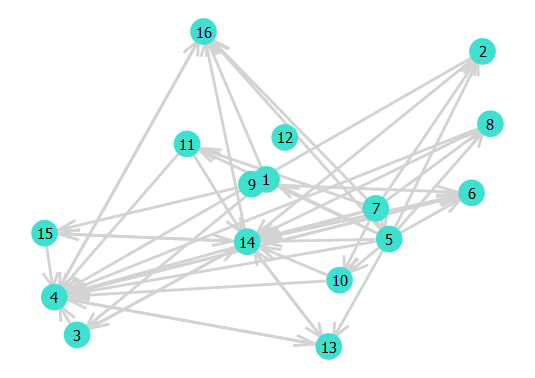

In [49]:
gplot(pool,layout = random_layout,nodelabel = collect(1:nv(pool)))